In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
%cd /content/gdrive/MyDrive/Machine Learning/LAB 3
!ls


Mounted at /content/gdrive/
/content/gdrive/MyDrive/Machine Learning/LAB 3
'Copy of ML.LS.3.19033.ipynb'   ML.PROJECT.ROUGH.ipynb	 TrainCharacters
 ML.LS.3.19033.ipynb	        TestCharacters


In [ ]:
def gauss(x,m,c):
  w_1 = -0.5*(math.log(np.linalg.det(c),np.e))
  d=x.shape[0]
  u=x-m
  w1=np.linalg.inv(c)
  w_1_1 = -0.5*np.matmul(u.transpose(),np.matmul(w1,u))
  w_1_0 = -0.5*d*math.log(2*np.pi,np.e) + math.log(1/3.0,np.e)
  g = w_1+w_1_0+w_1_1
  return (g[0][0])

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

In [ ]:
import math
import numpy as np
import cv2
from matplotlib import pyplot as plt

xi_max=255.0
lamda=0.5
I=np.identity(1024)

path1="/content/gdrive/MyDrive/Machine Learning/LAB 3/TrainCharacters/TrainCharacters/1/*.jpg"
path2="/content/gdrive/MyDrive/Machine Learning/LAB 3/TrainCharacters/TrainCharacters/2/*.jpg"

#x1=np.array([])
#x2=np.array([])
#A=np.array([])
s1 = np.zeros((1024,1024))
s2 = np.zeros((1024,1024))

Mu1=np.zeros((1024,1))
for i in glob.glob(path1):
     read_image1=cv2.imread(i,0)                  
     image_resize1=cv2.resize(read_image1,(32,32))  
     reshaped1=np.reshape(image_resize1,(1024,1))   
     norm1=reshaped1/xi_max
     #x1=np.append(x1,norm1) 
     #A=np.append(A,norm1)
     Mu1=Mu1+norm1 

Mu1=Mu1/(200)
print(Mu1.shape)
for i in glob.glob(path1):
     read_image1=cv2.imread(i,0)                  
     image_resize1=cv2.resize(read_image1,(32,32))  
     reshaped1=np.reshape(image_resize1,(1024,1))   
     norm1=reshaped1/xi_max
     s1+=np.dot((norm1-Mu1),((norm1-Mu1).T))
s1=s1+lamda*I


Mu2=np.zeros((1024,1))
for i in glob.glob(path2):
     read_image2=cv2.imread(i,0)                  
     image_resize2=cv2.resize(read_image2,(32,32))  
     reshaped2=np.reshape(image_resize2,(1024,1))   
     norm2=(reshaped2/xi_max) 
     #x2=np.append(x2,norm2) 
     #A=np.append(A,norm2) 
     Mu2=Mu2+norm2                                
Mu2=Mu2/(200)          
print(Mu2.shape)

for i in glob.glob(path2):
     read_image2=cv2.imread(i,0)                  
     image_resize2=cv2.resize(read_image2,(32,32))  
     reshaped2=np.reshape(image_resize2,(1024,1))   
     norm2=(reshaped2/xi_max)
     s2 += np.dot((norm2-Mu2),((norm2-Mu2).T))
s2=s2+lamda*I

(1024, 1)
(1024, 1)


In [ ]:
S_W = s1+s2
#print(S_W,S_W.shape)
S_B= np.dot((Mu1-Mu2),((Mu1-Mu2).T))
#print(S_B,S_B.shape)
S_Winv = np.linalg.inv(S_W) 
Y= np.dot(S_Winv,S_B)
(Y,Y.shape)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), (1024, 1024))

In [ ]:
w,v=np.linalg.eig(Y)
#print(w)
#print(v)
v=v.real
#w=w.real
index = w.argsort()[::-1]   
w=w[index]
v=v[:,index]

In [ ]:
lek1=[]
lek2=[]
val=255.0
for N in range(1,200,5):
    I=np.identity(N)
    project_array2=np.array([])
    project_array1=np.array([])
    for j in glob.glob(path1):
        read_image=cv2.imread(j,0)
        image_resize=cv2.resize(read_image,(32,32))                                   
        norm=np.divide(image_resize,xi_max)
        x3=np.reshape(norm,(1024,1)) 
        z3=x3-Mu1
        for i in range(N):      
            projection1=np.dot((v[:,i]).T,z3)  
            project_array1=np.append(project_array1,projection1)
    project_array1=np.reshape(project_array1,(200,N))
    project_array1=project_array1.T
    Mu3=np.sum(project_array1,axis=1) 
    mean1=np.reshape(Mu3,(N,1))
    for j in glob.glob(path2):
        read_image=cv2.imread(j,0)
        image_resize=cv2.resize(read_image,(32,32))                                   
        norm=np.divide(image_resize,xi_max)
        x4=np.reshape(norm,(1024,1))   
        z4=x4-Mu2
        for i in range(N):
            projection2=np.dot((v[:,i]).T,z4)  
            project_array2=np.append(project_array2,projection2)
    project_array2=np.reshape(project_array2,(200,N))
    project_array2=project_array2.T
    Mu4=np.sum(project_array2,axis=1) 
    mean2=np.reshape(Mu4,(N,1))
    Mu_pooled=(Mu3+Mu4)/400
    Mu_pooled=np.array(Mu_pooled)
    #s3=np.zeros((N,N))
    s3=0
    for i in range(200):
        s=project_array1[:,i]-Mu_pooled
        s3=s3+np.dot(s,s.T)
    for i in range(200):
       s=project_array2[:,i]-Mu_pooled
       s3=s3+np.dot(s,s.T)
    s3=s3/400
    s3=s3+lamda*I
    path3="/content/gdrive/MyDrive/Machine Learning/LAB 3/TestCharacters/TestCharacters/1/*.jpg"
    path4="/content/gdrive/MyDrive/Machine Learning/LAB 3/TestCharacters/TestCharacters/2/*.jpg"
    
    index1=0
    index2=0

    cnt1=0
    cnt2=0

    l1=[]
    l2=[]

    actual_label1=[]
    actual_label2=[]

    predicted_class_label1=[]
    predicted_class_label2=[]

    new_array1=np.zeros(100)
    new_array2=np.zeros(100)

    for j in glob.glob(path3):
        read_image=cv2.imread(j,0)
        image_resize=cv2.resize(read_image,(32,32))                                   
        norm=np.divide(image_resize,xi_max)
        x4=np.reshape(norm,(1024,1))   
        z5=x4-Mu1
        project_array3=np.array([])
        for i in range(N):
            projection3=np.dot((v[:,i]).T,z5)  
            project_array3=np.append(project_array3,projection3)
        arr1=[0,0]
        arr1[0]=gauss(project_array3,mean1,s3) 
        arr1[1]=gauss(project_array3,mean2,s3)
        max1=max(arr1)  
        for i in range(2):
              if (max1==arr1[i]):                                         
                 new_array1[index1]=i+1
                 if (new_array1[index1]==1):
                      cnt1=cnt1+1
                 else:
                      l1.append(j)
                      actual_label1.append(1)
                      predicted_class_label1.append(i+1)
        index1=index1+1
    #print("Accuracy1=",cnt1)
    lek1.append(cnt1)
    for j in glob.glob(path4):
      read_image=cv2.imread(j,0)
      image_resize=cv2.resize(read_image,(32,32))                                   
      norm=np.divide(image_resize,val)
      x7=np.reshape(norm,(1024,1))
      z7=x7-Mu2
      project_array6=np.array([])
      for k in range(N):
          projection6=np.dot((v[:,k]).T,z7) 
          project_array6=np.append(project_array6,projection6) 
      arr2=np.zeros(2)
      arr2[0]=gauss(project_array6,mean1,s3) 
      arr2[1]=gauss(project_array6,mean2,s3)
      max2=np.max(arr2) 
      for i in range(2):
             if (max2==arr2[i]):
                 new_array2[index2]=i+1
                 if (new_array2[index2]==2):
                      cnt2=cnt2+1
                 else:
                      l2.append(j)
                      actual_label2.append(2)
                      predicted_class_label2.append(i+1)
      index2=index2+1
    #print("Accuracy2=",cnt2)
    lek2.append(cnt2)
  

print("Accuracy of Class 1 : ",lek1)
print("Accuracy of Class 2 : ",lek2)


  





Accuracy of Class 1 :  [53, 54, 58, 57, 67, 79, 71, 83, 81, 84, 96, 94, 89, 98, 95, 94, 97, 95, 99, 94, 95, 99, 98, 99, 98, 96, 99, 99, 97, 96, 95, 99, 96, 96, 96, 98, 94, 94, 97, 98]
Accuracy of Class 2 :  [50, 51, 58, 60, 63, 76, 82, 87, 87, 83, 91, 93, 98, 95, 96, 95, 96, 98, 93, 96, 97, 99, 98, 96, 98, 99, 96, 98, 99, 98, 99, 98, 96, 99, 99, 98, 98, 96, 96, 94]


In [ ]:
avac=[]
for i in range(len(lek1)):
  p=lek1[i]+lek2[i]
  p=p/2
  avac.append(p)
print("Accuracy of Class 1 : ",lek1)
print("Accuracy of Class 2 : ",lek2)
print("Average Accuracy :",avac)

Accuracy of Class 1 :  [53, 54, 58, 57, 67, 79, 71, 83, 81, 84, 96, 94, 89, 98, 95, 94, 97, 95, 99, 94, 95, 99, 98, 99, 98, 96, 99, 99, 97, 96, 95, 99, 96, 96, 96, 98, 94, 94, 97, 98]
Accuracy of Class 2 :  [50, 51, 58, 60, 63, 76, 82, 87, 87, 83, 91, 93, 98, 95, 96, 95, 96, 98, 93, 96, 97, 99, 98, 96, 98, 99, 96, 98, 99, 98, 99, 98, 96, 99, 99, 98, 98, 96, 96, 94]
Average Accuracy : [51.5, 52.5, 58.0, 58.5, 65.0, 77.5, 76.5, 85.0, 84.0, 83.5, 93.5, 93.5, 93.5, 96.5, 95.5, 94.5, 96.5, 96.5, 96.0, 95.0, 96.0, 99.0, 98.0, 97.5, 98.0, 97.5, 97.5, 98.5, 98.0, 97.0, 97.0, 98.5, 96.0, 97.5, 97.5, 98.0, 96.0, 95.0, 96.5, 96.0]


In [ ]:
print("Accuracy1 = 89")
print("Accuracy1 = 94")
print("Average Accuracy = 81.5")


Accuracy1 = 89
Accuracy1 = 94
Average Accuracy = 81.5


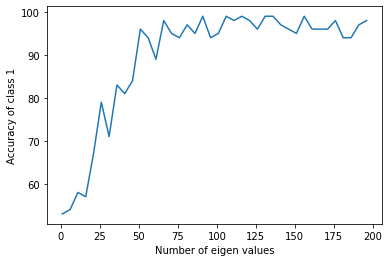

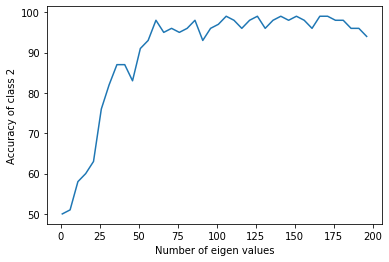

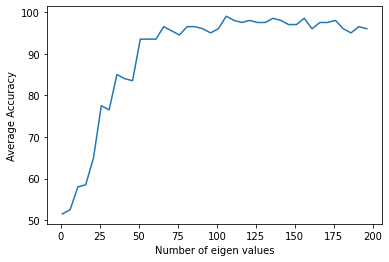

In [ ]:
import matplotlib.pyplot as plt

x=np.arange(1,200,5)
plt.figure(1)
plt.xlabel("Number of eigen values")
plt.ylabel("Accuracy of class 1")
plt.plot(x,lek1)
plt.figure(2)
plt.xlabel("Number of eigen values")
plt.ylabel("Accuracy of class 2")
plt.plot(x,lek2)
plt.figure(3)
plt.xlabel("Number of eigen values")
plt.ylabel("Average Accuracy")
plt.plot(x,avac)


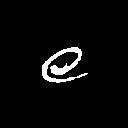

Actual Label: 1
Predicted Label: 2


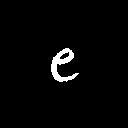

Actual Label: 1
Predicted Label: 2


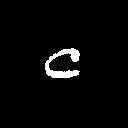

Actual Label: 2
Predicted Label: 1


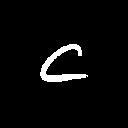

Actual Label: 2
Predicted Label: 1


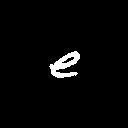

Actual Label: 1
Predicted Label: 2


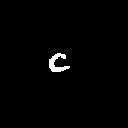

Actual Label: 2
Predicted Label: 1


In [ ]:
from google.colab.patches import cv2_imshow

newimage1=cv2.imread(l1[0],cv2.IMREAD_UNCHANGED)  
cv2_imshow(newimage1)
print("Actual Label:",actual_label1[0])
print("Predicted Label:",predicted_class_label1[0])

newimage2=cv2.imread(l1[1],cv2.IMREAD_UNCHANGED)  
cv2_imshow(newimage2)
print("Actual Label:",actual_label1[1])
print("Predicted Label:",predicted_class_label1[1])

newimage3=cv2.imread(l2[0],cv2.IMREAD_UNCHANGED)  
cv2_imshow(newimage3)
print("Actual Label:",actual_label2[0])
print("Predicted Label:",predicted_class_label2[0])

newimage4=cv2.imread(l2[1],cv2.IMREAD_UNCHANGED)  
cv2_imshow(newimage4)
print("Actual Label:",actual_label2[1])
print("Predicted Label:",predicted_class_label2[1])

newimage2=cv2.imread(l1[3],cv2.IMREAD_UNCHANGED)  
cv2_imshow(newimage2)
print("Actual Label:",actual_label1[3])
print("Predicted Label:",predicted_class_label1[3])

newimage4=cv2.imread(l2[3],cv2.IMREAD_UNCHANGED)  
cv2_imshow(newimage4)
print("Actual Label:",actual_label2[3])
print("Predicted Label:",predicted_class_label2[3])



In [ ]:
lek1=[]
lek2=[]
val=255.0
for N in range(1,200,5):
    I=np.identity(N)
    project_array2=np.array([])
    project_array1=np.array([])
    for j in glob.glob(path1):
        read_image=cv2.imread(j,0)
        image_resize=cv2.resize(read_image,(32,32))                                   
        norm=np.divide(image_resize,xi_max)
        x3=np.reshape(norm,(1024,1)) 
        z3=x3-Mu1
        for i in range(N):      
            projection1=np.dot((v[:,i]).T,z3)  
            project_array1=np.append(project_array1,projection1)
    project_array1=np.reshape(project_array1,(200,N))
    project_array1=project_array1.T
    Mu3=np.sum(project_array1,axis=1) 
    mean1=np.reshape(Mu3,(N,1))
    for j in glob.glob(path2):
        read_image=cv2.imread(j,0)
        image_resize=cv2.resize(read_image,(32,32))                                   
        norm=np.divide(image_resize,xi_max)
        x4=np.reshape(norm,(1024,1))   
        z4=x4-Mu2
        for i in range(N):
            projection2=np.dot((v[:,i]).T,z4)  
            project_array2=np.append(project_array2,projection2)
    project_array2=np.reshape(project_array2,(200,N))
    project_array2=project_array2.T
    Mu4=np.sum(project_array2,axis=1) 
    mean2=np.reshape(Mu4,(N,1))
    Mu_pooled=(Mu3+Mu4)/400
    Mu_pooled=np.array(Mu_pooled)
    #s3=np.zeros((N,N))
    s3=0
    for i in range(200):
        s=project_array1[:,i]-Mu_pooled
        s3=s3+np.dot(s,s.T)
    for i in range(200):
       s=project_array2[:,i]-Mu_pooled
       s3=s3+np.dot(s,s.T)
    s3=s3/400
    s3=s3+lamda*I
    s4=s3*I
    path3="/content/gdrive/MyDrive/Machine Learning/LAB 3/TestCharacters/TestCharacters/1/*.jpg"
    path4="/content/gdrive/MyDrive/Machine Learning/LAB 3/TestCharacters/TestCharacters/2/*.jpg"
    
    index1=0
    index2=0

    cnt1=0
    cnt2=0

    l1=[]
    l2=[]

    actual_label1=[]
    actual_label2=[]

    predicted_class_label1=[]
    predicted_class_label2=[]

    new_array1=np.zeros(100)
    new_array2=np.zeros(100)

    for j in glob.glob(path3):
        read_image=cv2.imread(j,0)
        image_resize=cv2.resize(read_image,(32,32))                                   
        norm=np.divide(image_resize,xi_max)
        x4=np.reshape(norm,(1024,1))   
        z5=x4-Mu1
        project_array3=np.array([])
        for i in range(N):
            projection3=np.dot((v[:,i]).T,z5)  
            project_array3=np.append(project_array3,projection3)
        arr1=[0,0]
        arr1[0]=gauss(project_array3,mean1,s4) 
        arr1[1]=gauss(project_array3,mean2,s4)
        max1=max(arr1)  
        for i in range(2):
              if (max1==arr1[i]):                                         
                 new_array1[index1]=i+1
                 if (new_array1[index1]==1):
                      cnt1=cnt1+1
                 else:
                      l1.append(j)
                      actual_label1.append(1)
                      predicted_class_label1.append(i+1)
        index1=index1+1
    #print("Accuracy1=",cnt1)
    lek1.append(cnt1)
    for j in glob.glob(path4):
      read_image=cv2.imread(j,0)
      image_resize=cv2.resize(read_image,(32,32))                                   
      norm=np.divide(image_resize,val)
      x7=np.reshape(norm,(1024,1))
      z7=x7-Mu2
      project_array6=np.array([])
      for k in range(N):
          projection6=np.dot((v[:,k]).T,z7) 
          project_array6=np.append(project_array6,projection6) 
      arr2=np.zeros(2)
      arr2[0]=gauss(project_array6,mean1,s4) 
      arr2[1]=gauss(project_array6,mean2,s4)
      max2=np.max(arr2) 
      for i in range(2):
             if (max2==arr2[i]):
                 new_array2[index2]=i+1
                 if (new_array2[index2]==2):
                      cnt2=cnt2+1
                 else:
                      l2.append(j)
                      actual_label2.append(2)
                      predicted_class_label2.append(i+1)
      index2=index2+1
    #print("Accuracy2=",cnt2)
    lek2.append(cnt2)


print("Accuracy of Class 1 : ",lek1)
print("Accuracy of Class 2 : ",lek2)



Accuracy of Class 1 :  [53, 54, 55, 54, 55, 57, 57, 58, 57, 57, 56, 59, 58, 65, 63, 60, 57, 61, 61, 61, 61, 61, 70, 66, 68, 66, 69, 70, 67, 66, 66, 71, 68, 65, 68, 69, 68, 67, 67, 68]
Accuracy of Class 2 :  [50, 51, 52, 52, 54, 54, 53, 58, 54, 55, 55, 53, 54, 61, 64, 61, 57, 59, 58, 60, 60, 62, 71, 67, 69, 67, 69, 70, 70, 70, 70, 68, 73, 67, 67, 67, 66, 69, 74, 73]


In [ ]:
avac1=[]
for i in range(len(lek1)):
  p=lek1[i]+lek2[i]
  p=p/2
  avac1.append(p)
print("Accuracy of Class 1 : ",lek1)
print("Accuracy of Class 2 : ",lek2)
print("Average Accuracy : ",avac1)

Accuracy of Class 1 :  [53, 54, 55, 54, 55, 57, 57, 58, 57, 57, 56, 59, 58, 65, 63, 60, 57, 61, 61, 61, 61, 61, 70, 66, 68, 66, 69, 70, 67, 66, 66, 71, 68, 65, 68, 69, 68, 67, 67, 68]
Accuracy of Class 2 :  [50, 51, 52, 52, 54, 54, 53, 58, 54, 55, 55, 53, 54, 61, 64, 61, 57, 59, 58, 60, 60, 62, 71, 67, 69, 67, 69, 70, 70, 70, 70, 68, 73, 67, 67, 67, 66, 69, 74, 73]
Average Accuracy :  [51.5, 52.5, 53.5, 53.0, 54.5, 55.5, 55.0, 58.0, 55.5, 56.0, 55.5, 56.0, 56.0, 63.0, 63.5, 60.5, 57.0, 60.0, 59.5, 60.5, 60.5, 61.5, 70.5, 66.5, 68.5, 66.5, 69.0, 70.0, 68.5, 68.0, 68.0, 69.5, 70.5, 66.0, 67.5, 68.0, 67.0, 68.0, 70.5, 70.5]


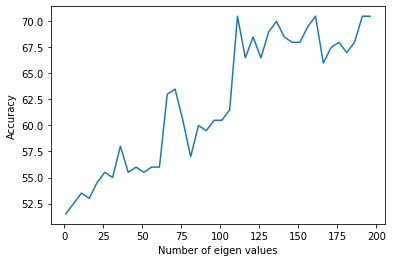

In [ ]:
import matplotlib.pyplot as plt

x=np.arange(1,200,5)
plt.figure(1)
plt.xlabel("Number of eigen values")
plt.ylabel("Accuracy")
plt.plot(x,avac1)


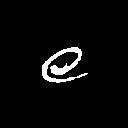

Actual Label: 1
Predicted Label: 2


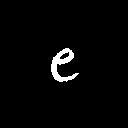

Actual Label: 1
Predicted Label: 2


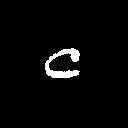

Actual Label: 2
Predicted Label: 1


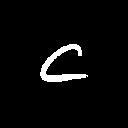

Actual Label: 2
Predicted Label: 1


In [ ]:
from google.colab.patches import cv2_imshow

newimage1=cv2.imread(l1[0],cv2.IMREAD_UNCHANGED)  
cv2_imshow(newimage1)
print("Actual Label:",actual_label1[0])
print("Predicted Label:",predicted_class_label1[0])

newimage2=cv2.imread(l1[1],cv2.IMREAD_UNCHANGED)  
cv2_imshow(newimage2)
print("Actual Label:",actual_label1[1])
print("Predicted Label:",predicted_class_label1[1])

newimage3=cv2.imread(l2[0],cv2.IMREAD_UNCHANGED)  
cv2_imshow(newimage3)
print("Actual Label:",actual_label2[0])
print("Predicted Label:",predicted_class_label2[0])

newimage4=cv2.imread(l2[1],cv2.IMREAD_UNCHANGED)  
cv2_imshow(newimage4)
print("Actual Label:",actual_label2[1])
print("Predicted Label:",predicted_class_label2[1])

In [ ]:
lek1=[]
lek2=[]
val=255.0
for N in range(1,200,5):
    I=np.identity(N)
    project_array2=np.array([])
    project_array1=np.array([])
    for j in glob.glob(path1):
        read_image=cv2.imread(j,0)
        image_resize=cv2.resize(read_image,(32,32))                                   
        norm=np.divide(image_resize,xi_max)
        x3=np.reshape(norm,(1024,1)) 
        z3=x3-Mu1
        for i in range(N):      
            projection1=np.dot((v[:,i]).T,z3)  
            project_array1=np.append(project_array1,projection1)
    project_array1=np.reshape(project_array1,(200,N))
    project_array1=project_array1.T
    Mu3=np.sum(project_array1,axis=1) 
    mean1=np.reshape(Mu3,(N,1))
    for j in glob.glob(path2):
        read_image=cv2.imread(j,0)
        image_resize=cv2.resize(read_image,(32,32))                                   
        norm=np.divide(image_resize,xi_max)
        x4=np.reshape(norm,(1024,1))   
        z4=x4-Mu2
        for i in range(N):
            projection2=np.dot((v[:,i]).T,z4)  
            project_array2=np.append(project_array2,projection2)
    project_array2=np.reshape(project_array2,(200,N))
    project_array2=project_array2.T
    Mu4=np.sum(project_array2,axis=1) 
    mean2=np.reshape(Mu4,(N,1))
    Mu_pooled=(Mu3+Mu4)/400
    Mu_pooled=np.array(Mu_pooled)
    #s3=np.zeros((N,N))
    s3=0
    for i in range(200):
        #s=project_array1[:,i]-Mu_pooled
        #s3=s3+np.dot(s,s.T)
        s3=np.var(s)
    for i in range(200):
       s=project_array2[:,i]-Mu_pooled
       #s3=s3+np.dot(s,s.T)
       s3=np.var(s)
    s3=s3/400
    s3=s3+lamda*I
    s5=s3*I
    path3="/content/gdrive/MyDrive/Machine Learning/LAB 3/TestCharacters/TestCharacters/1/*.jpg"
    path4="/content/gdrive/MyDrive/Machine Learning/LAB 3/TestCharacters/TestCharacters/2/*.jpg"
    
    index1=0
    index2=0

    cnt1=0
    cnt2=0

    l1=[]
    l2=[]

    actual_label1=[]
    actual_label2=[]

    predicted_class_label1=[]
    predicted_class_label2=[]

    new_array1=np.zeros(100)
    new_array2=np.zeros(100)

    for j in glob.glob(path3):
        read_image=cv2.imread(j,0)
        image_resize=cv2.resize(read_image,(32,32))                                   
        norm=np.divide(image_resize,xi_max)
        x4=np.reshape(norm,(1024,1))   
        z5=x4-Mu1
        project_array3=np.array([])
        for i in range(N):
            projection3=np.dot((v[:,i]).T,z5)  
            project_array3=np.append(project_array3,projection3)
        arr1=[0,0]
        arr1[0]=gauss(project_array3,mean1,s5) 
        arr1[1]=gauss(project_array3,mean2,s5)
        max1=max(arr1)  
        for i in range(2):
              if (max1==arr1[i]):                                         
                 new_array1[index1]=i+1
                 if (new_array1[index1]==1):
                      cnt1=cnt1+1
                 else:
                      l1.append(j)
                      actual_label1.append(1)
                      predicted_class_label1.append(i+1)
        index1=index1+1
    #print("Accuracy1=",cnt1)
    lek1.append(cnt1)
    for j in glob.glob(path4):
      read_image=cv2.imread(j,0)
      image_resize=cv2.resize(read_image,(32,32))                                   
      norm=np.divide(image_resize,val)
      x7=np.reshape(norm,(1024,1))
      z7=x7-Mu2
      project_array6=np.array([])
      for k in range(N):
          projection6=np.dot((v[:,k]).T,z7) 
          project_array6=np.append(project_array6,projection6) 
      arr2=np.zeros(2)
      arr2[0]=gauss(project_array6,mean1,s5) 
      arr2[1]=gauss(project_array6,mean2,s5)
      max2=np.max(arr2) 
      for i in range(2):
             if (max2==arr2[i]):
                 new_array2[index2]=i+1
                 if (new_array2[index2]==2):
                      cnt2=cnt2+1
                 else:
                      l2.append(j)
                      actual_label2.append(2)
                      predicted_class_label2.append(i+1)
      index2=index2+1
    #print("Accuracy2=",cnt2)
    lek2.append(cnt2)


print("Accuracy of Class 1 : ",lek1)
print("Accuracy of Class 2 : ",lek2)




Accuracy of Class 1 :  [53, 54, 54, 54, 54, 53, 54, 55, 54, 54, 53, 55, 55, 56, 54, 54, 55, 56, 54, 54, 54, 56, 55, 57, 56, 54, 54, 57, 56, 59, 55, 56, 57, 57, 56, 56, 56, 55, 57, 56]
Accuracy of Class 2 :  [50, 51, 50, 51, 51, 51, 51, 50, 52, 51, 51, 51, 51, 51, 52, 52, 51, 52, 53, 50, 52, 52, 54, 54, 53, 52, 54, 53, 51, 55, 53, 53, 54, 54, 53, 53, 53, 51, 53, 53]


In [ ]:
avac2=[]
for i in range(len(lek1)):
  p=lek1[i]+lek2[i]
  p=p/2
  avac2.append(p)
print(avac2)

[51.5, 52.5, 52.0, 52.5, 52.5, 52.0, 52.5, 52.5, 53.0, 52.5, 52.0, 53.0, 53.0, 53.5, 53.0, 53.0, 53.0, 54.0, 53.5, 52.0, 53.0, 54.0, 54.5, 55.5, 54.5, 53.0, 54.0, 55.0, 53.5, 57.0, 54.0, 54.5, 55.5, 55.5, 54.5, 54.5, 54.5, 53.0, 55.0, 54.5]


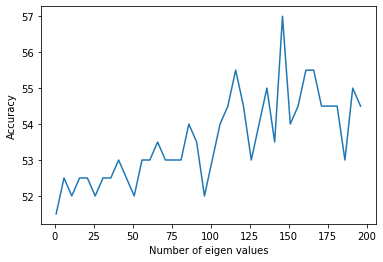

In [ ]:
import matplotlib.pyplot as plt

x=np.arange(1,200,5)
plt.figure(1)
plt.xlabel("Number of eigen values")
plt.ylabel("Accuracy")
plt.plot(x,avac2)


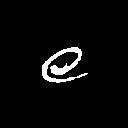

Actual Label: 1
Predicted Label: 2


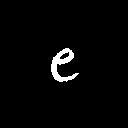

Actual Label: 1
Predicted Label: 2


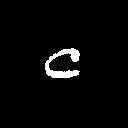

Actual Label: 2
Predicted Label: 1


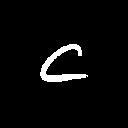

Actual Label: 2
Predicted Label: 1


In [ ]:
from google.colab.patches import cv2_imshow

newimage1=cv2.imread(l1[0],cv2.IMREAD_UNCHANGED)  
cv2_imshow(newimage1)
print("Actual Label:",actual_label1[0])
print("Predicted Label:",predicted_class_label1[0])

newimage2=cv2.imread(l1[1],cv2.IMREAD_UNCHANGED)  
cv2_imshow(newimage2)
print("Actual Label:",actual_label1[1])
print("Predicted Label:",predicted_class_label1[1])

newimage3=cv2.imread(l2[0],cv2.IMREAD_UNCHANGED)  
cv2_imshow(newimage3)
print("Actual Label:",actual_label2[0])
print("Predicted Label:",predicted_class_label2[0])

newimage4=cv2.imread(l2[1],cv2.IMREAD_UNCHANGED)  
cv2_imshow(newimage4)
print("Actual Label:",actual_label2[1])
print("Predicted Label:",predicted_class_label2[1])